<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/Reena_Singh_(Final_Project)Project_3_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#@title Install the 0.24 version of scikit-learn
!pip uninstall scikit-learn -y

!pip install -U scikit-learn


Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 113kB/s 


The dataset used for this project is from Kaggle.

**About the dataset:** This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.(The Pima /ˈpiːmə/[3] (or Akimel O'odham, also spelled Akimel Oʼotham, "River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona, as well as northwestern Mexico in the states of Sonora and Chihuahua)

**Content:** The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


**Goal:** I build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

**This colab is divided into different parts:**

1.Data Analyis Exploration

2.Missing data

3.Corelation between columns (Visualization)

4.Measure the strength of linear relationship by calculating pearson correlation coefficient

5.Convert the data frame into numpy arrays

6.Prediction

7.Splitting the data into predictors and target arrays

8.First machine learning technique: Random Forest

9.Support Vector Machine

10.Grid Searching and Pipelines

11.Setting up the pipeline without imputer

12.Setting up the pipeline with imputer

13.Random forests without imputer (Slow)

14.Observations and Learning

15.Conclusion

It is a **binary (2-class) classificatio**n problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:


Input Variables or features or predictors 

1.Number of times pregnant.

2.Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

3.Diastolic blood pressure (mm Hg).

4.Triceps skinfold thickness (mm).-The main purpose of skinfold measurements is to estimate general fatness and the distribution of subcutaneous adipose tissue.

5.2-Hour serum insulin (mu U/ml).

6.Body mass index (weight in kg/(height in m)^2).

7.Diabetes pedigree function.-provides “a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject.”

8.Age (years).

**Output Variable or response variable**

Class variable (0 or 1).

**I am importing modules which I need for analysis**

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra

**Importing the data**

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving diabetes.csv to diabetes.csv


**Dataset is now stored in a Pandas Dataframe**

In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))


print(df2)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [ ]:
len(df2)

768

In [ ]:
df2.shape

(768, 9)

**What is missing value?**-In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

count of missing values column wise


In [ ]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 count of missing values across rows


In [ ]:
df2.isnull().sum(axis = 1)


0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Length: 768, dtype: int64

count of missing values of the entire dataframe


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2[["Pregnancies","BMI"]]

Pregnancies   BMI
0              6  33.6
1              1  26.6
2              8  23.3
3              1  28.1
4              0  43.1
..           ...   ...
763           10  32.9
764            2  36.8
765            5  26.2
766            1  30.1
767            1  30.4

[768 rows x 2 columns]

In [ ]:
df2[["Pregnancies","Age"]]

Pregnancies  Age
0              6   50
1              1   31
2              8   32
3              1   21
4              0   33
..           ...  ...
763           10   63
764            2   27
765            5   30
766            1   47
767            1   23

[768 rows x 2 columns]

In [ ]:
df2["BMI"].max()

67.1

In [ ]:
df2["BMI"].min()

0.0

In [ ]:
df2["Glucose"].min()

0

In [ ]:
df2["Glucose"].max()

199

**The value_counts() function** is used to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element.

In [ ]:
print(df2.BMI.value_counts()); 
print ("")

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64



In [ ]:
print(df2.Glucose.value_counts()); 
print ("")

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64



In [ ]:
print(df2.BloodPressure.value_counts());
print ("")

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64



In [ ]:
print(df2.SkinThickness.value_counts()); 
print ("")

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64



In [ ]:
print(df2.Insulin.value_counts());
print ("")

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64



Specifically, the following columns have an invalid zero minimum value:

1: Plasma glucose concentration
2: Diastolic blood pressure
3: Triceps skinfold thickness
4: 2-Hour serum insulin
5: Body mass index

In [ ]:
print(df2.head(20))

    Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0             6      148             72  ...                     0.627   50        1
1             1       85             66  ...                     0.351   31        0
2             8      183             64  ...                     0.672   32        1
3             1       89             66  ...                     0.167   21        0
4             0      137             40  ...                     2.288   33        1
5             5      116             74  ...                     0.201   30        0
6             3       78             50  ...                     0.248   26        1
7            10      115              0  ...                     0.134   29        0
8             2      197             70  ...                     0.158   53        1
9             8      125             96  ...                     0.232   54        1
10            4      110             92  ...                     

We can get a count of the number of missing values on each of these columns. We can do this my marking all of the values in the subset of the DataFrame we are interested in that have zero values as True. We can then count the number of true values in each column.

We can do this my marking all of the values in the subset of the DataFrame we are interested in that have zero values as True. We can then count the number of true values in each column.

In [ ]:
# Calculation of the percentage of missing data 

# adding up the missing value occurences-BMI=11,Insulin=374,SkinThickness=227,BloodPressure=35,Glucose=5
missing = 11 + 5 + 35 + 374 + 227 
msg = "About {}% missing data points in the dataset "

# finding the percentage of missing data on the columns.
print (msg.format(round(missing/768 * 100))) 

# Later I use "imputation strategy" to deal with missing data

About 85% missing data points in the dataset 


In [ ]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df2.BMI

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [ ]:
df2.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [ ]:
df2.tail()

Pregnancies  Glucose  ...  Age  Outcome
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[5 rows x 9 columns]

Use GroupBy 

The GROUP BY Statement in SQL is used to arrange identical data into groups with the help of some functions. i.e if a particular column has same values in different rows then it will arrange these rows in a group.

How many pregnancies on different age group 

In [ ]:
df2.groupby("Age")['Pregnancies'].count()

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: Pregnancies, dtype: int64

In [ ]:
m_preg_df=df2[df2["Age"]==21]
print(m_preg_df)
m_preg_df.groupby("Pregnancies")["BMI"].count()

     Pregnancies  Glucose  ...  Age  Outcome
3              1       89  ...   21        0
55             1       73  ...   21        0
60             2       84  ...   21        0
90             1       80  ...   21        0
94             2      142  ...   21        0
..           ...      ...  ...  ...      ...
671            1       99  ...   21        0
713            0      134  ...   21        0
721            1      114  ...   21        0
736            0      126  ...   21        0
738            2       99  ...   21        0

[63 rows x 9 columns]


Pregnancies
0    21
1    23
2    14
3     3
4     2
Name: BMI, dtype: int64

In [ ]:
df2.groupby(["Glucose","BloodPressure"])["Age"].count()

Glucose  BloodPressure
0        48               1
         68               2
         74               1
         80               1
44       62               1
                         ..
196      90               1
197      70               3
         74               1
198      66               1
199      76               1
Name: Age, Length: 655, dtype: int64

In [ ]:
df2.groupby(["Glucose","BloodPressure"])["Age"].max()

Glucose  BloodPressure
0        48               22
         68               41
         74               21
         80               37
44       62               36
                          ..
196      90               41
197      70               62
         74               39
198      66               28
199      76               22
Name: Age, Length: 655, dtype: int64

In [ ]:
df2.groupby(["Glucose","BloodPressure"])["Age"].min()

Glucose  BloodPressure
0        48               22
         68               22
         74               21
         80               37
44       62               36
                          ..
196      90               41
197      70               31
         74               39
198      66               28
199      76               22
Name: Age, Length: 655, dtype: int64

Convert to a categorical variable (0-No Diabetic and 1-Diabetic)

In [ ]:
df2["Outcome"] = df2.Outcome.map({ 0 : "False", 1 : "True"}).astype("category")

df2["Outcome"]

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: Outcome, Length: 768, dtype: category
Categories (2, object): ['False', 'True']

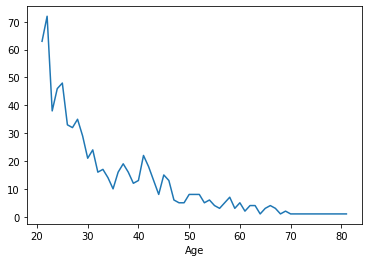

In [ ]:
df2.groupby("Age")['Outcome'].count().plot()

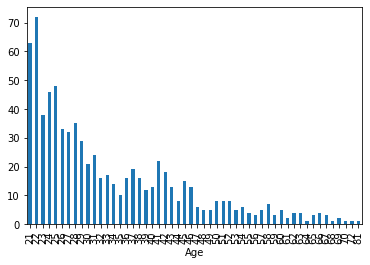

In [ ]:
df2.groupby("Age")['Outcome'].count().plot(kind = "bar")

In [ ]:
birth_df=df2[df2["Age"]==21]

birth_df.groupby("BMI")["BloodPressure"].count()

#df2.groupby("Age")["Outcome"].count()

BMI
0.0     3
18.2    2
19.1    1
21.0    1
21.8    2
22.1    1
22.5    1
22.6    2
23.0    1
23.2    1
23.7    1
24.3    1
24.6    1
24.7    3
24.8    1
25.1    1
25.2    2
25.4    2
26.0    1
26.2    1
26.4    1
27.4    2
27.7    1
27.8    1
28.1    1
28.6    1
28.7    1
29.2    1
29.7    1
30.4    1
30.8    3
31.0    1
32.4    1
33.2    2
33.6    1
34.6    2
35.7    1
35.8    2
36.6    1
36.9    1
38.1    1
38.6    1
40.6    1
40.7    1
42.1    1
42.7    1
42.9    1
43.5    1
Name: BloodPressure, dtype: int64

In [ ]:
birth1_df=df2[df2["Age"]==81]

birth1_df.groupby("BMI")["BloodPressure"].count()

BMI
25.9    1
Name: BloodPressure, dtype: int64

In [ ]:
# Looking for missing values and returns a boolean with columns with missing values
result=pd.isnull(df2).any()
print(result)


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

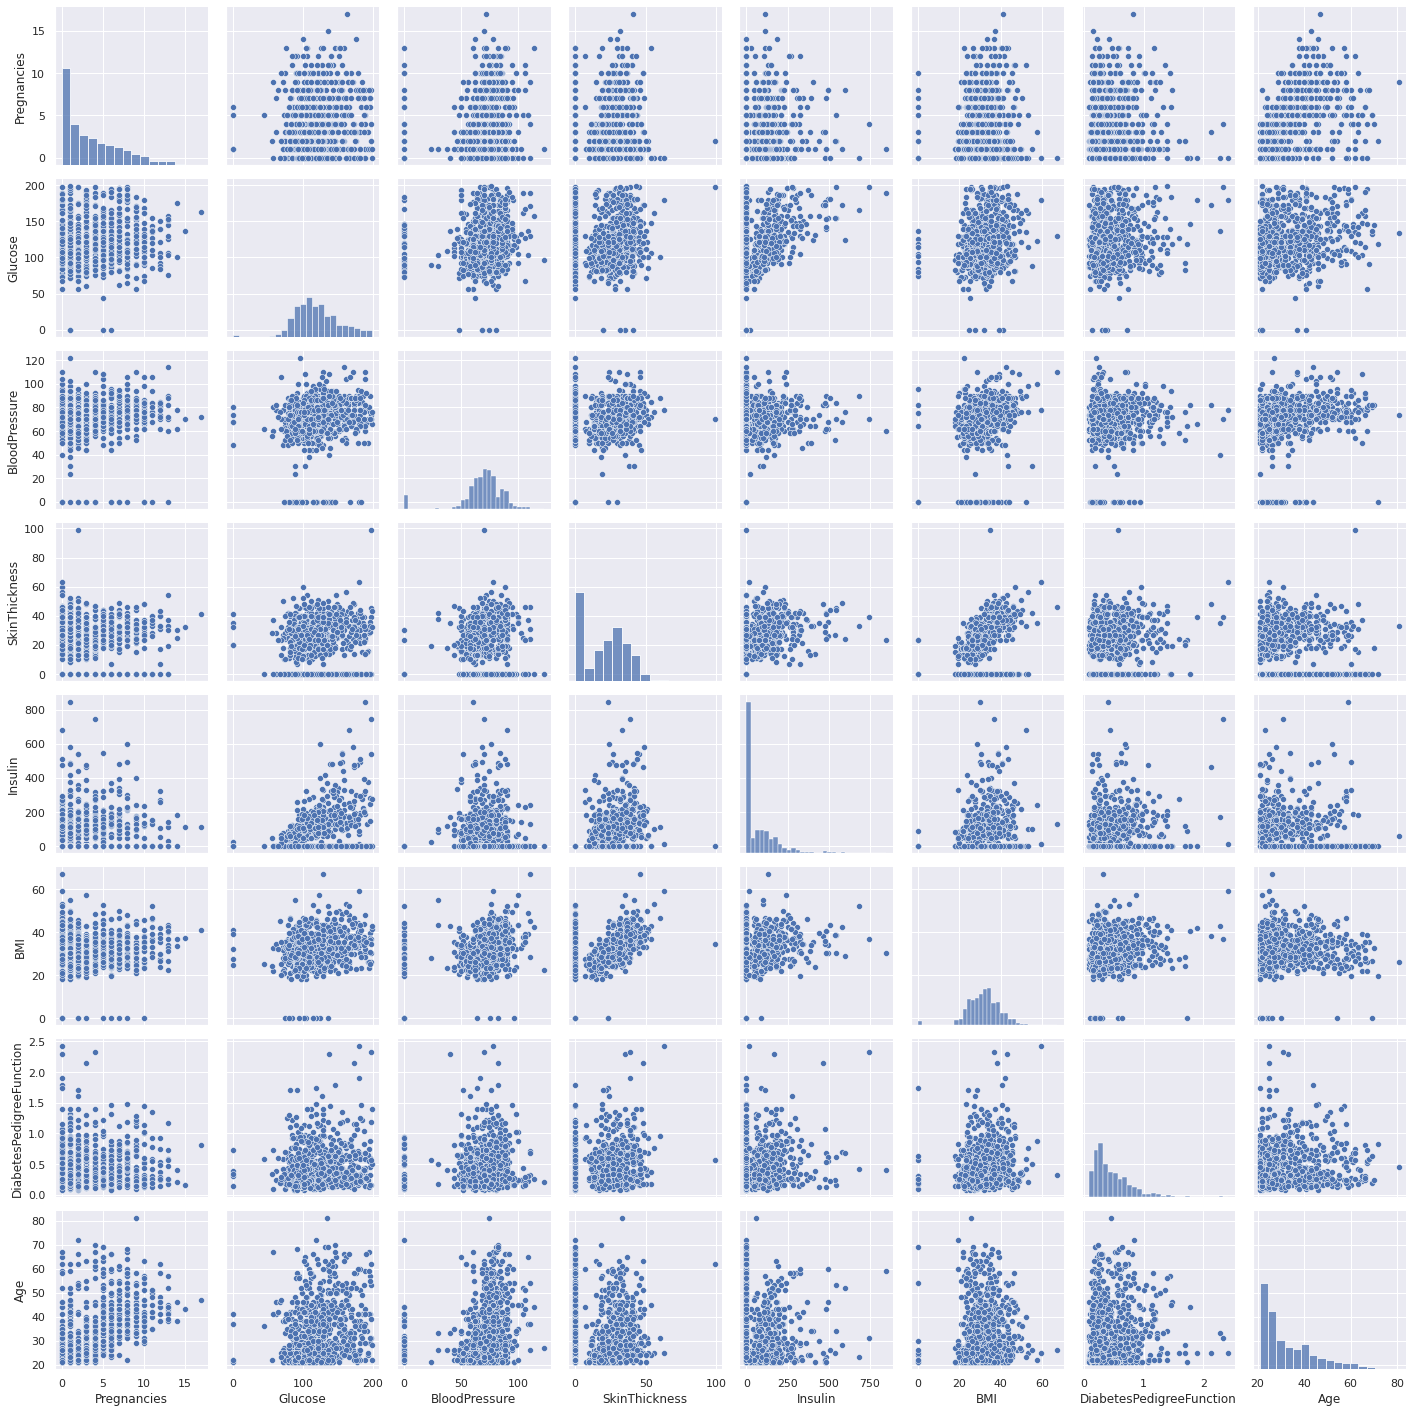

In [ ]:
# exploratory visualisation to see if there is any correlation between columns
# Drawing all the columns at once seemed like a good idea in the start
# I noticed it was difficult to see the axes, therefore, i made subplots instead

# import necessary modules
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

sns.set() 

#plt.title("Pairplot between the different columns of the dataset.")
sns.pairplot(df2, vars = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

plt.show()

In [ ]:
# Import our libraries

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

# Take a look at the first few rows of the dataset
df2.head(15)

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0             6      148             72  ...                     0.627   50     True
1             1       85             66  ...                     0.351   31    False
2             8      183             64  ...                     0.672   32     True
3             1       89             66  ...                     0.167   21    False
4             0      137             40  ...                     2.288   33     True
5             5      116             74  ...                     0.201   30    False
6             3       78             50  ...                     0.248   26     True
7            10      115              0  ...                     0.134   29    False
8             2      197             70  ...                     0.158   53     True
9             8      125             96  ...                     0.232   54     True
10            4      110             92  ...                     0.191   30    False
11           10      168             74  ...                     0.537   34     True
12           10      139             80  ...                     1.441   57    False
13            1      189             60  ...                     0.398   59     True
14            5      166             72  ...                     0.587   51     True

[15 rows x 9 columns]

In [ ]:

# Take a look at the last few rows of the dataset
df2.tail(25)

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
743            9      140             94  ...                     0.734   45     True
744           13      153             88  ...                     1.174   39    False
745           12      100             84  ...                     0.488   46    False
746            1      147             94  ...                     0.358   27     True
747            1       81             74  ...                     1.096   32    False
748            3      187             70  ...                     0.408   36     True
749            6      162             62  ...                     0.178   50     True
750            4      136             70  ...                     1.182   22     True
751            1      121             78  ...                     0.261   28    False
752            3      108             62  ...                     0.223   25    False
753            0      181             88  ...                     0.222   26     True
754            8      154             78  ...                     0.443   45     True
755            1      128             88  ...                     1.057   37     True
756            7      137             90  ...                     0.391   39    False
757            0      123             72  ...                     0.258   52     True
758            1      106             76  ...                     0.197   26    False
759            6      190             92  ...                     0.278   66     True
760            2       88             58  ...                     0.766   22    False
761            9      170             74  ...                     0.403   43     True
762            9       89             62  ...                     0.142   33    False
763           10      101             76  ...                     0.171   63    False
764            2      122             70  ...                     0.340   27    False
765            5      121             72  ...                     0.245   30    False
766            1      126             60  ...                     0.349   47     True
767            1       93             70  ...                     0.315   23    False

[25 rows x 9 columns]

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [ ]:

df2.describe()

Pregnancies     Glucose  ...  DiabetesPedigreeFunction         Age
count   768.000000  768.000000  ...                768.000000  768.000000
mean      3.845052  120.894531  ...                  0.471876   33.240885
std       3.369578   31.972618  ...                  0.331329   11.760232
min       0.000000    0.000000  ...                  0.078000   21.000000
25%       1.000000   99.000000  ...                  0.243750   24.000000
50%       3.000000  117.000000  ...                  0.372500   29.000000
75%       6.000000  140.250000  ...                  0.626250   41.000000
max      17.000000  199.000000  ...                  2.420000   81.000000

[8 rows x 8 columns]

**From the above we can say, There are zeros in the minimum BMI as well as Glucose, BloodPressure, SkinThickness and Insulin**

*Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):*

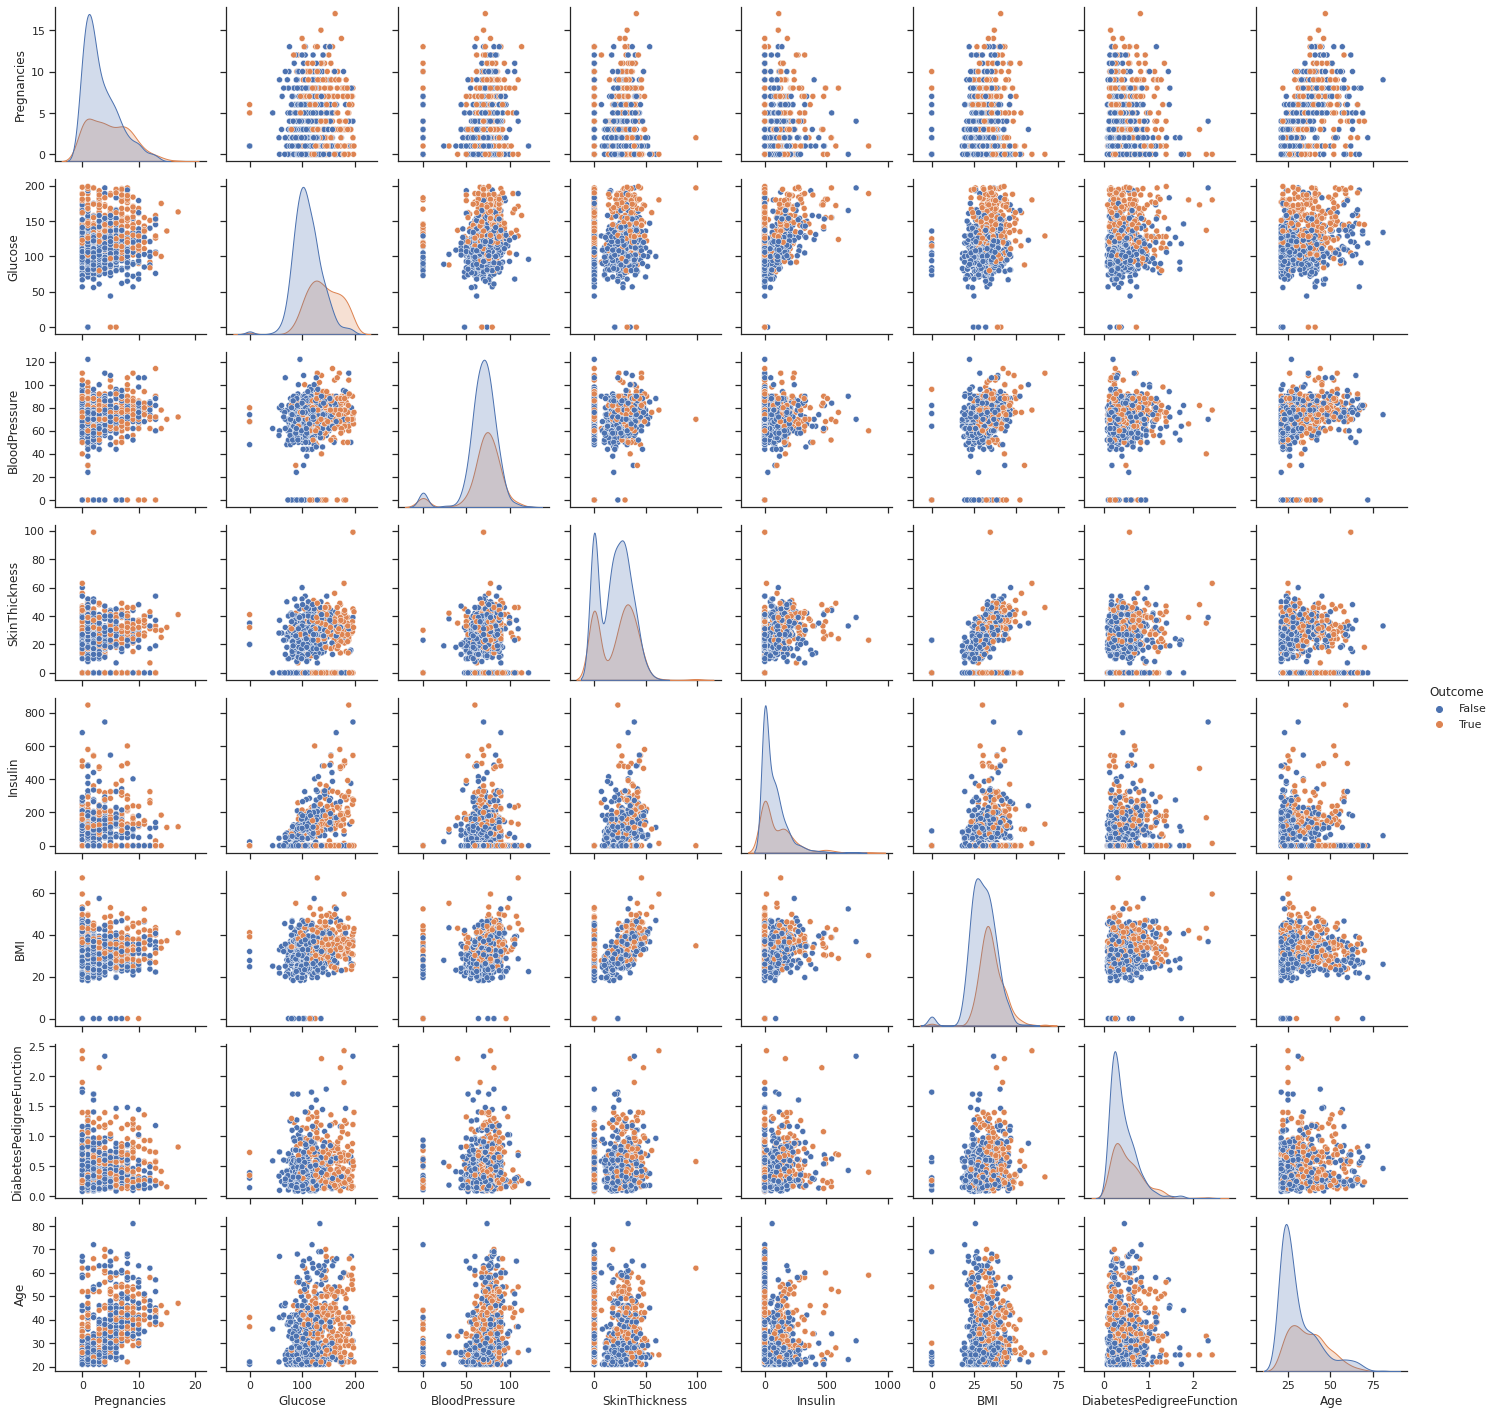

In [ ]:
sns.pairplot(df2, hue="Outcome");

 To force marginal histograms:

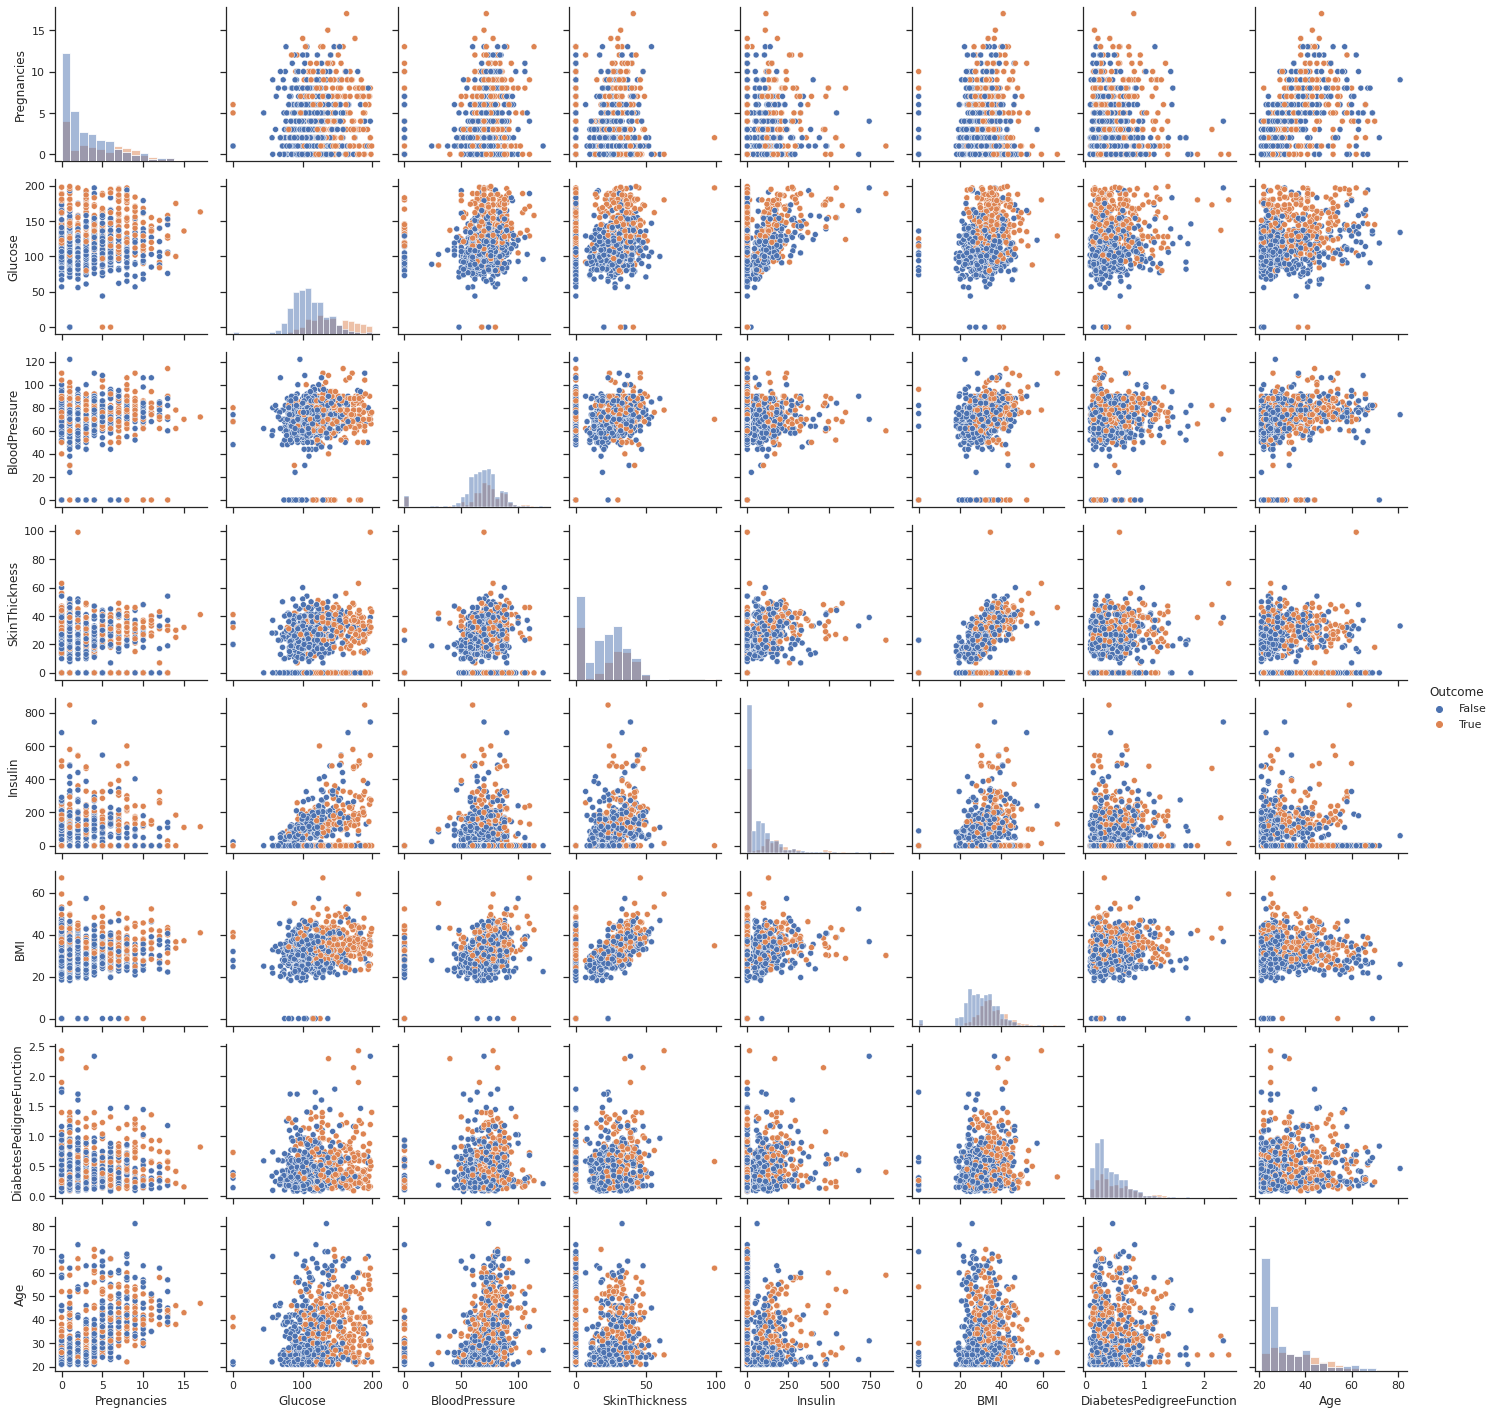

In [ ]:
sns.pairplot(df2, hue="Outcome", diag_kind="hist");

The kind parameter determines both the diagonal and off-diagonal plotting style. Several options are available, including using kdeplot() to draw KDEs:

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis.

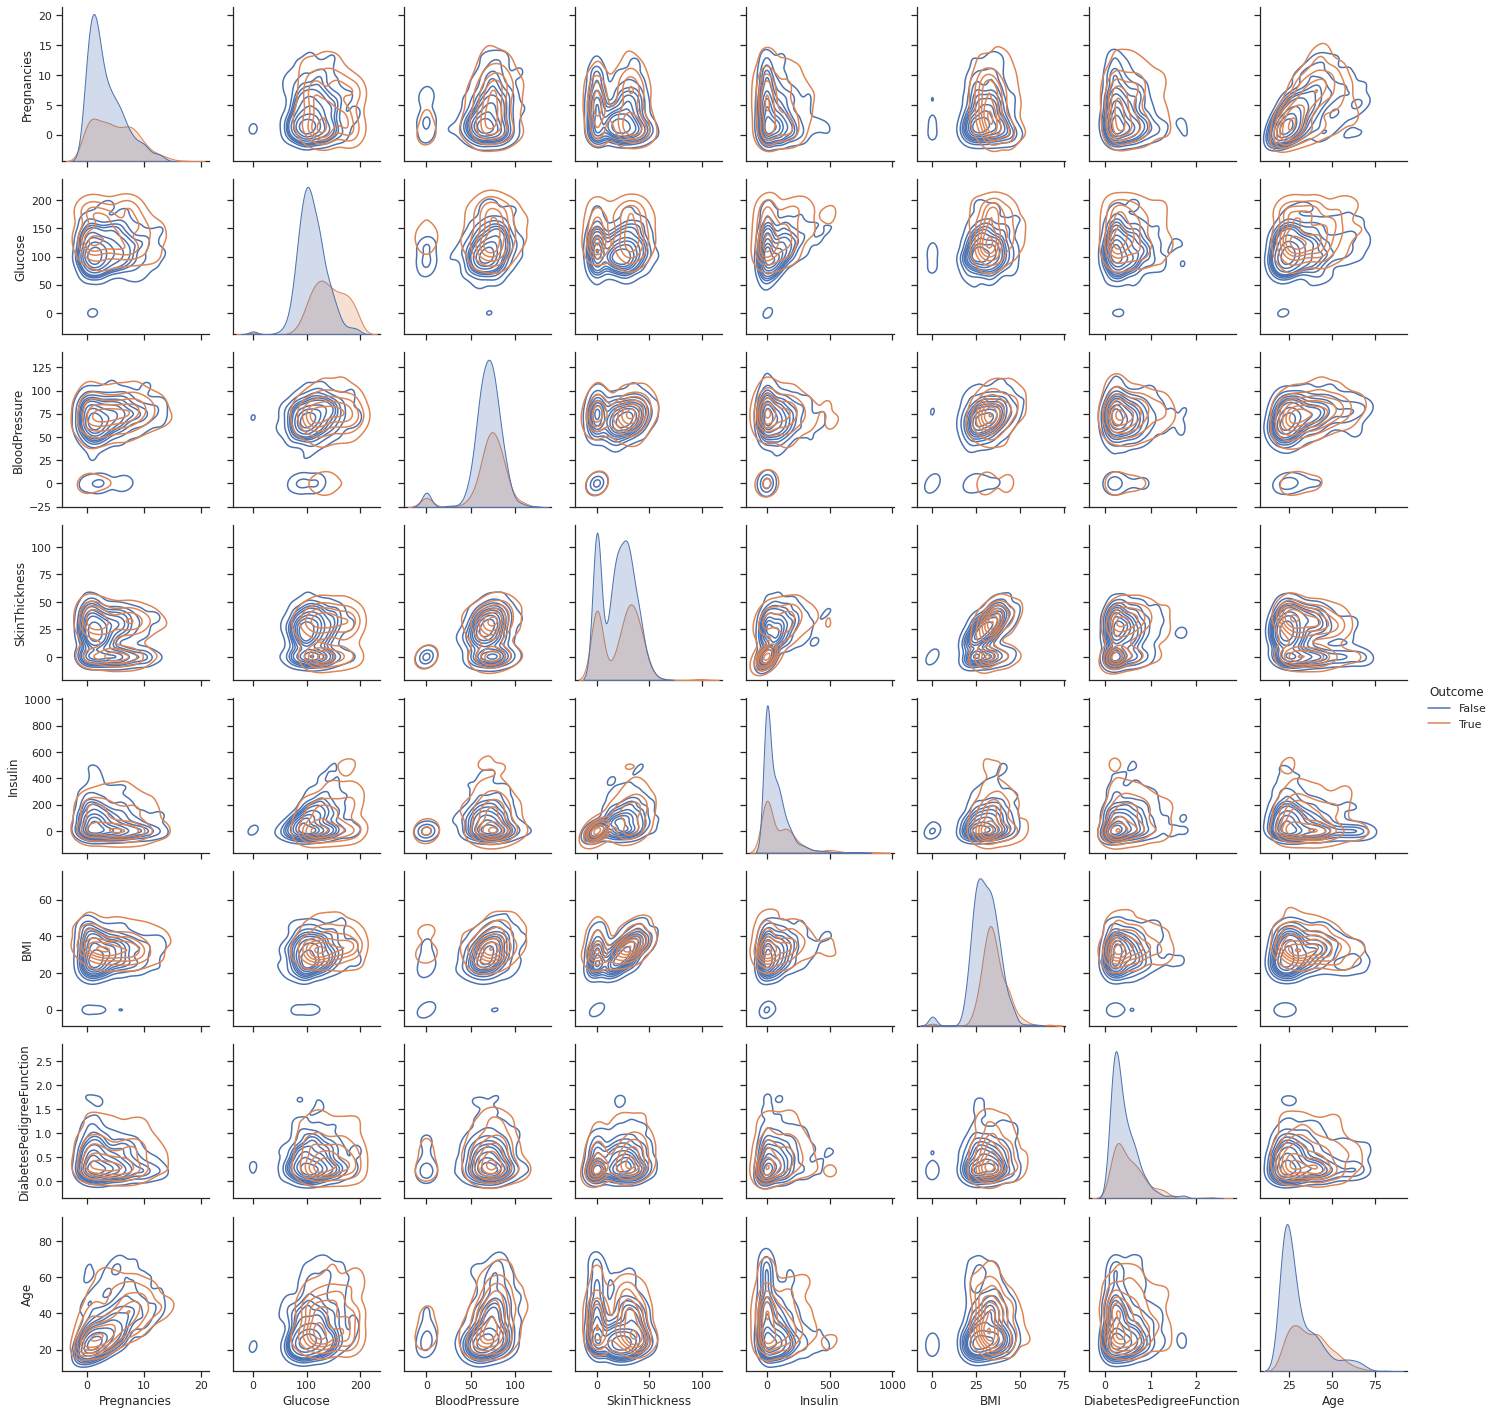

In [ ]:

sns.pairplot(df2, hue="Outcome",kind="kde");

Or histplot() to draw both bivariate and univariate histograms:

Bivariate histograms are a type of bar plot for numeric data that group the data into 2-D bins. After you create a Histogram2 object, you can modify aspects of the histogram by changing its property values. This is particularly useful for quickly modifying the properties of the bins or changing the display.



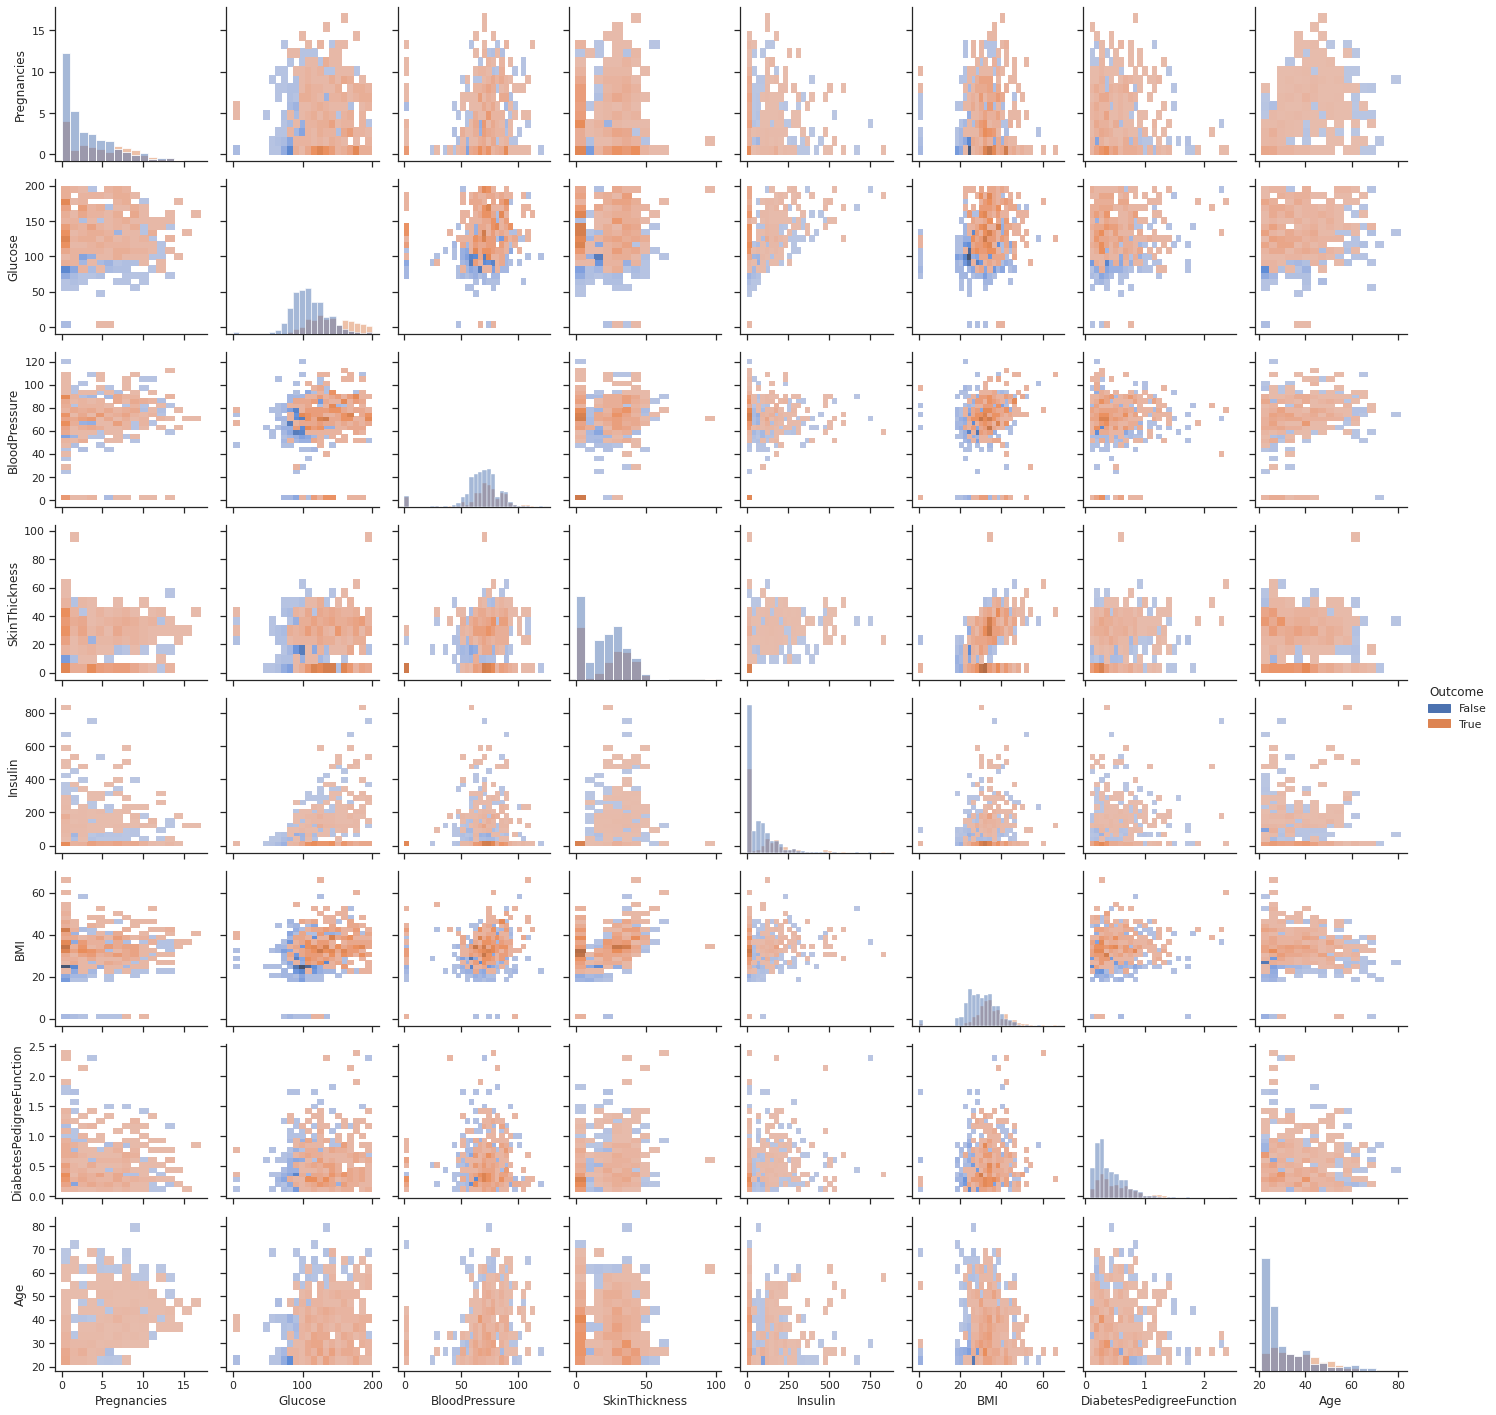

In [ ]:

sns.pairplot(df2, hue="Outcome",kind="hist");

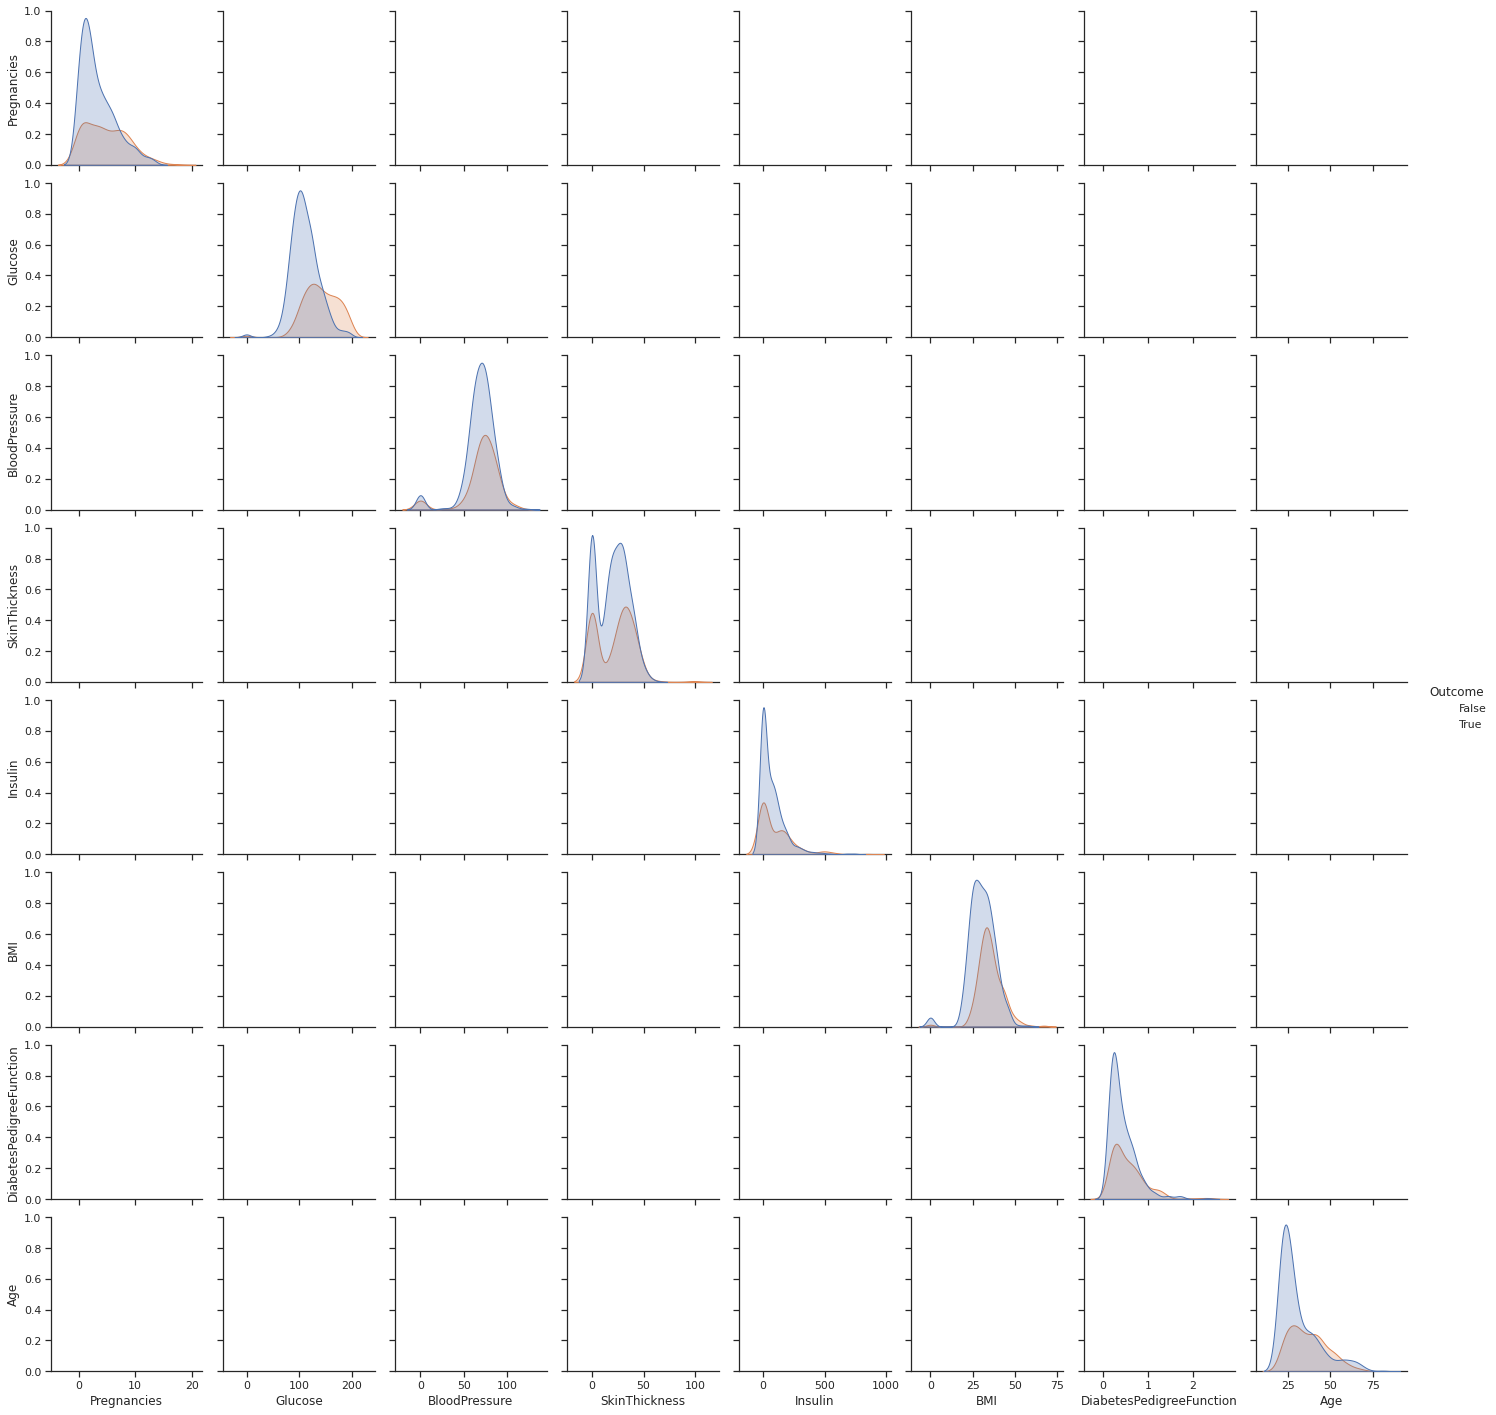

In [ ]:
sns.pairplot(df2, hue="Outcome",kind="histplot");

Heat map for machine learning means It turns out that generating a heat map of all the feature variables — feature variables as row headers and column headers, and the variable vs itself on the diagonal— is extremely powerful way to visualize relationships between variables in high dimensional space.

Heatmap is a way to show some sort of matrix plot. To use a heatmap the data should be in a matrix form. By matrix we mean that the index name and the column name must match in some way so that the data that we fill inside the cells are relevant.

A heat map is a two-dimensional representation of data in which values are represented by colors.

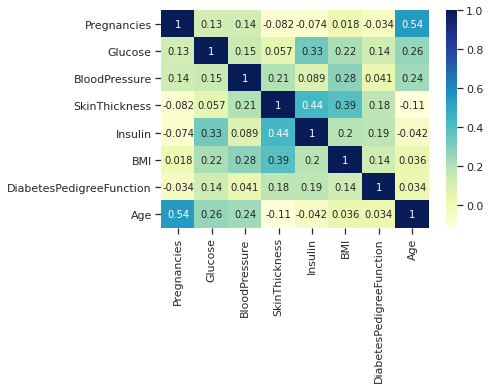

In [ ]:

sns.heatmap(df2.corr(), annot=True, cmap="YlGnBu");

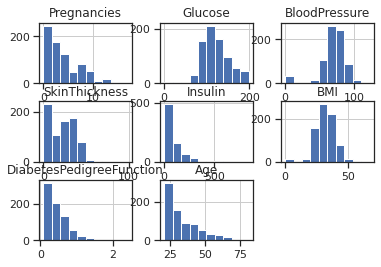

In [ ]:

df2.hist();

**Correlation** means to find out the association between the two variables and **Correlation coefficients** are used to find out how strong the is relationship between the two variables. The most popular correlation coefficient is Pearson’s Correlation Coefficient. It is very commonly used 

In [ ]:
# some variables seem correlated. To find the pearson correlation coefficient for one.
# Let's try a correlation calculation the correlation coefficient between Insulin and Glucose column 
# correlation coefficient (measure of strength of a linear relationship
# between two variables) 
GlucoInsul = np.corrcoef(df2.Insulin, df2.Glucose)
print (GlucoInsul)


[[1.         0.33135711]
 [0.33135711 1.        ]]


In [ ]:
PregGluco = np.corrcoef(df2.Pregnancies, df2.Glucose)
print (PregGluco)

[[1.         0.12945867]
 [0.12945867 1.        ]]


In [ ]:
PregAge = np.corrcoef(df2.Pregnancies, df2.Age)
print (PregAge)

[[1.         0.54434123]
 [0.54434123 1.        ]]


In [ ]:
BpressGluco = np.corrcoef(df2.BloodPressure, df2.Glucose)
print (BpressGluco )

[[1.         0.15258959]
 [0.15258959 1.        ]]


In [ ]:
DpfGluco = np.corrcoef(df2.DiabetesPedigreeFunction, df2.Glucose)
print (DpfGluco )

[[1.        0.1373373]
 [0.1373373 1.       ]]


*0.3,0.1,0.5,0.1,0.1 are all really weak positive linear relationship*

In [ ]:
# Converting the dataframe into a numpy arrays
# this is a necessary step to proceed with the analysis of the data set for the algorithm in the library to work 

y = df2['Outcome'].values # target
X = df2.drop('Outcome', axis = 1).values # predictors

print (y)
print (X) ; print ("")
print (type(X))
# successful

['True', 'False', 'True', 'False', 'True', ..., 'False', 'False', 'False', 'True', 'False']
Length: 768
Categories (2, object): ['False', 'True']
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]

<class 'numpy.ndarray'>


**After successfully splitting the data into predictors and target arrays. Let's dive into the first machine learning technique Random forests. Random Forests is a collection of decision trees, where each tree is slightly different from the others. Like decision trees which use if-else statements to finally get to a conclusion. However, they average out results and eliminate bias and give fair results.**

Since our dataset here is quite clean, we will jump straight into the machine learning. Our goal here is to be able to predict cases of diabetes. First, you need to identify the y vector and X matrix. Then, the following code will divide your dataset into training and test data.

We have a training and testing dataset, we need to create some models that and ultimately find the best of them. 

It can often be **difficult (and extremely time consuming) to test all the possible hyperparameter combinations to find the best models.** Therefore, it is often useful to **set up a randomized search**.

In practice, randomized searches across **hyperparameters** have shown to be more time consuming, while still optimizing quite well. **Random search** is a **technique** where random combinations of the hyperparameters are used to find the best solution for the built model.

In order to use the randomized search effectively, we want to have a pretty reasonable understanding of the distributions that best give a sense of our hyperparameters. **Understanding what values are possible for your hyperparameters will allow us to write a grid search that performs well** (and doesn't break).

**A random forest classifier.**

A random forest is a meta estimator that fits a number of decision tree classifiers (The basic idea behind any decision tree algorithm is as follows:
Select the best attribute using Attribute Selection Measures(ASM) to split the records.Make that attribute a decision node and breaks the dataset into smaller subsets.) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

**difference between decision tree and random forest?**

A decision tree is built on an entire dataset, using all the features/variables of interest, whereas a random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results.

In [ ]:
# Needed for the next step in model parameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# random forest test
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 2)

# Instantiate classifier
forest = RandomForestClassifier(n_estimators = 10, random_state = 0) 
#n_estimators:int, default=100 The number of trees in the forest.
#random_state:int, RandomState instance or None, default=None
#Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True)
#and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). 

# fit on training data
forest.fit(X_train, y_train)

# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.773


At last, we need to make prediction. It can be done with the help of following script −

In [ ]:
y_pred = forest.predict(X_test)

Next, print the results as follows −

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[97 12]
 [23 22]]
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.89      0.85       109
        True       0.65      0.49      0.56        45

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.76      0.77      0.76       154

Accuracy: 0.7727272727272727


Before model tuning, i wanted to try the Support Vector Machines for classification. They make decision boundaries the algorithm will place the data to its respective boundary based of how near it is to the cluster of points placed on the data.

**Support Vector Classification SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 2) # changed to 2 

# Instantiate classifier
svc = SVC(kernel = "linear") # changed to "linear"

# fit on training data
svc.fit(X_train, y_train)

# Seeing the metrics
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.773


At last, we need to make prediction. It can be done with the help of following script −

In [ ]:
y_pred = svc.predict(X_test)

Next, print the results as follows −

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[95 14]
 [24 21]]
Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.87      0.83       109
        True       0.60      0.47      0.52        45

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154

Accuracy: 0.7532467532467533


Without tuning the model parameters and adding partitionining the training and test data to 60:40 or 80:20 training. The two models make acceptable scores. The performance is the same if you look at the training and test set accuracy. 

Which model should I use? Which parameters will I have to tune to make the best prediction? I have done that **using pipelines next as well as cross-validation**. Moreover, the models could be over or underfitting. We need to address that.

In [ ]:
# import the necessary modules
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Add a standard scaler since SVC works better if the data is scaled.
#Effective use of the model will require appropriate preparation of the input data and hyperparameter tuning of the model. Collectively, 
#the linear sequence of steps required to prepare the data, tune the model, and transform the predictions is called the modeling pipeline.
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel = "linear"))])

# Next tune hyperparameters of the estimators separately in the pipeline
#Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained. ... 
#Efficiently search the space of possible hyperparameters. 
#Easy to manage a large set of experiments for hyperparameter tuning.
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
    'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

# Train-test split,instantiate,fit and predict paradigm
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

# grid search with cross-validation
#This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.
#So, in the end, we can select the best parameters from the listed hyperparameters
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 1, 'classifier__gamma': 0.1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.77
Test-set score: 0.75


After performing cross-validation, of hyperparameters using GridSearchCV. The outcome of the grid search with SVC with the StandardScaler preprocessing. Gives a C = 1, and a gamma of 0.01 gives the best result. We still haven't dealt with imputing the missing data. Let's make a classification pipeline to address that and see if there's any improvement. In addition, to splitting the train and test set data.

Effect of the parameters gamma and C

In [ ]:
# Without imputer
# Setting up the pipeline

steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('SVM', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]

pipeline = Pipeline(steps)

# Specifying the hyperparameter space
#The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors
#only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.
parameters = {'SVM__C':[1] ,
             'SVM__gamma':[0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

# Instantiate the GridSearchCV
grid2 = GridSearchCV(pipeline,parameters)

# Fit to the training set
grid2.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = grid2.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(grid2.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(grid2.best_params_))

Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

       False       0.80      0.90      0.85       109
        True       0.66      0.47      0.55        45

    accuracy                           0.77       154
   macro avg       0.73      0.68      0.70       154
weighted avg       0.76      0.77      0.76       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


Most machine learning models cannot handle missing values on their own. Thus imputing missing values becomes a necessary preprocessing step.

Additionally, machine learning models cannot work with categorical (string) data as well, specifically scikit-learn. Before building a machine learning model, we need to convert the categorical variables into numeric types.

In [ ]:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# With an imputer
# creates imputer to replace missing values.

# missing_values parameter defines what we are looking out for to impute.

# strategy parameter implies with what value you want to replace the missing value.

# strategy can be either: mean, median, most_frequent

steps = [('SimpleImputer', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
         ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('SVM', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]

pipeline = Pipeline(steps)

# Specifying the hyperparameter space
parameters = {'SVM__C':[1] ,
            'SVM__gamma':[0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

# Instantiate the GridSearchCV
grid2 = GridSearchCV(pipeline,parameters)

# Fit to the training set
grid2.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = grid2.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(grid2.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(grid2.best_params_))

score = cross_val_score(SVC(kernel = "rbf", C = 1, gamma = 0.01), X, y, cv = 5, scoring = 'roc_auc').mean()
print("Accuracy mean cross-validation score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

       False       0.80      0.90      0.85       109
        True       0.66      0.47      0.55        45

    accuracy                           0.77       154
   macro avg       0.73      0.68      0.70       154
weighted avg       0.76      0.77      0.76       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}
Accuracy mean cross-validation score: 0.69 (+/- 0.00)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# With an imputer
# creates imputer to replace missing values.

# missing_values parameter defines what we are looking out for to impute.

# strategy parameter implies with what value you want to replace the missing value.

# strategy can be either: mean, median, most_frequent

steps = [('SimpleImputer', SimpleImputer(missing_values = np.nan, strategy = 'median')),
         ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('SVM', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]

pipeline = Pipeline(steps)

# Specifying the hyperparameter space
parameters = {'SVM__C':[1] ,
            'SVM__gamma':[0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

# Instantiate the GridSearchCV
grid2 = GridSearchCV(pipeline,parameters)

# Fit to the training set
grid2.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = grid2.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(grid2.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(grid2.best_params_))

score = cross_val_score(SVC(kernel = "rbf", C = 1, gamma = 0.01), X, y, cv = 5, scoring = 'roc_auc').mean()
print("Accuracy mean cross-validation score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

       False       0.80      0.90      0.85       109
        True       0.66      0.47      0.55        45

    accuracy                           0.77       154
   macro avg       0.73      0.68      0.70       154
weighted avg       0.76      0.77      0.76       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}
Accuracy mean cross-validation score: 0.69 (+/- 0.00)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# With an imputer
# creates imputer to replace missing values.

# missing_values parameter defines what we are looking out for to impute.

# strategy parameter implies with what value you want to replace the missing value.

# strategy can be either: mean, median, most_frequent

steps = [('SimpleImputer', SimpleImputer(missing_values = np.nan, strategy = 'mean')),
         ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('SVM', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]

pipeline = Pipeline(steps)

# Specifying the hyperparameter space
parameters = {'SVM__C':[1] ,
            'SVM__gamma':[0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

# Instantiate the GridSearchCV
grid2 = GridSearchCV(pipeline,parameters)

# Fit to the training set
grid2.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = grid2.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(grid2.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(grid2.best_params_))

score = cross_val_score(SVC(kernel = "rbf", C = 1, gamma = 0.01), X, y, cv = 5, scoring = 'roc_auc').mean()
print("Accuracy mean cross-validation score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

       False       0.80      0.90      0.85       109
        True       0.66      0.47      0.55        45

    accuracy                           0.77       154
   macro avg       0.73      0.68      0.70       154
weighted avg       0.76      0.77      0.76       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}
Accuracy mean cross-validation score: 0.69 (+/- 0.00)


After playing around with test_size argument there's an improvement. A very slight improvement in the precision of the 1 class that is the one with diabetes. In short, our model has a high precision that is, number of samples predicted as positive and are actually positive for that class and medium recall in other words, the sensitivity. Random forests was beat by SVM. But what if we tried using it. What would we get? Let's try.

In [ ]:
# random forests
# without imputer
# rather slow

steps = [('classifier', RandomForestClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'classifier__max_features': [1,2,3,4,5],
              'classifier__max_leaf_nodes':[-2,-1,2,3,4],
              'classifier__n_estimators': [100,250,500,10000]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

# Instantiate the GridSearchCV
forest2 = GridSearchCV(pipeline, param_grid = parameters)

# Fit to the training set
forest2.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = forest2.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(forest2.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(forest2.best_params_))

Accuracy: 0.7604166666666666
              precision    recall  f1-score   support

       False       0.81      0.86      0.83       134
        True       0.62      0.53      0.57        58

    accuracy                           0.76       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.75      0.76      0.76       192

Tuned Model Parameters: {'classifier__max_features': 2, 'classifier__max_leaf_nodes': -1, 'classifier__n_estimators': 500}


In [ ]:
score2 = cross_val_score(RandomForestClassifier(n_estimators = 10000, max_features = 2, max_leaf_nodes =  -1), X, y, cv = 5, scoring = 'roc_auc').mean()
print("Accuracy mean cross-validation score: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))

Accuracy mean cross-validation score: 0.83 (+/- 0.00)


**Observations and Learning:**

Diabetes Dataset: look at a dataset that has known missing values.

Mark Missing Values: learn how to mark missing values in a dataset.

Missing Values Causes Problems: see how a machine learning algorithm can fail when it contains missing values.

Impute Missing Values: replace missing values with sensible values.

Algorithms that Support Missing Values: learn about algorithms that support missing values.

**Why I used Random Forest?**

Random forest algorithm can be used for both classifications and regression task. It provides higher accuracy through cross validation. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average.


**Why I used SVM? **

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. Compared to newer algorithms like neural networks, they have two main advantages: higher speed and better performance with a limited number of samples (in the thousands). To sum up:A support vector machine allows you to classify data that’s linearly separable.If it isn’t linearly separable, you can use the kernel trick to make it work.

**Conclusion:**

The goal of this project is to predict the onset of diabetes in Pima Indians using machine learning. A model that could do this very well, could help focusing prevention measures to the affected.


With hyperparameter tuning, SVC and random forest performed better. In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters are learned.

However, performance of SVC is better since the accuracy was slightly higher than for the random forest. In comparison to SVC, I would use random forest for production since it improves with more tuning.

When I have done cross-validation, I observed something very interesting.The random forest algorithm gives 83% score on average Receiver operating curve and 0.80 accuracy sometimes if you change random state. I added the cross-validation score since it is not influenced by the train-test-split and gives us a clue about how the models would perform in different scenarios.

I have a question?What about the precision, recall, f1-score and support would they improve? I think if the data had less missing values < 50. I think the models would work better. 

I will explore more.....


Thanks!!